# Jupyter Notebook UI to graph your speed trace (with opto) data!

Version 1.3 - Joseph Liang, Rankin Lab
Updated:
1. Upgraded folder path selection application
2. Upgraded dataset management (less moving parts for end-user)
3. output changed from tif -> png

## Known bug: Step 2 an empty windows displays in Mac. May also apply to linux/windows.

## Beginner Essentials:
1. Shift-Enter to run each cell. After you run, you should see an output "done step #". If not, an error has occured
2. When inputting your own code/revising the code, make sure you close all your quotation marks '' and brackets (), [], {}.
3. Don't leave any commas (,) hanging! (make sure an object always follows a comma. If there is nothing after a comma, remove the comma!
4. Learning to code? Each line of code is annotated to help you understand how this code works!

## 3. Run all cells/steps sequentially, even the ones that do not require input

## Steps that require input: #3, #6.1, #7

# 1. Importing Packages Required (No input required, just run)

In [22]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
import os #<- package used to work with system filepaths
from ipywidgets import widgets #<- widget tool to generate button
from IPython.display import display #<- displays button
from tkinter import Tk, filedialog #<- Tkinter is a GUI package
import scipy as scipy
print("done step 1")

done step 1


# 2. Pick filepath (just run and click button)

Run the following cell and clicke the button 'Select Folder' to pick a filepath.

## Important: Later on, this script uses the total file path for each file to import and group data. That means if your folder has whatever your strain is named, the script will not work.

(ex. if your folder has "N2" in it this script sees all files inside this folder as having the "N2" search key)

## An easy fix is to just rename your folder to something else (make your strains lower-case, or just have the date)

In [ ]:
### Select Folder App - After you run, you can select your folder for filepath
button = widgets.Button(description = 'Select Folder') #<- creates a button variable
display(button) #<- displays the button in output

def select_folder(b): #<- defines an action. This action requires a variable, so an arbitrary one 'b' is there
    global folder_path #<- sets a variable as a global variable, not just within this action
    #Tk().withdraw() #<- Tkinter likes to create annoying empty windows. This removes them
    folder_path = filedialog.askdirectory() #<- Opens up a file explorer window, and determines folder path
    #Tk().update() #<- below
    #Tk().destroy() #<- this and the line above it removes the file explorer window after a selection is made
    print(folder_path) #<- this helps confirm that this action was performed
    print('done step 2')
button.on_click(select_folder)

# 3. User Defined Variables (Add input here)

Here, we add some constants to help you blaze through this code.

## 3.1: Setting time bins
pretty self explanatory

## 3.2: Setting light flashes (for visualization of light pulses in opto experiments)
Here you are generating a separate dataframe to draw out light bars on your graph to visualize your light pulses. This will take a bit of elementary-level math. Think of it as drawing (connecting-the-dots style) rectangles that are 0.5 high strung-together. Start at (0,0), then (x1,0), then (x1, y1) ... etc

____|-----|______|-----|____ etc.  

Once you have that written down, put all the y's together in one dataframe, and the x's together in the other one..

## 3.3: Setting view range for your graph
Top, bottom = y axis view range
left, right = x axis view range



In [2]:
# Setting 0.5s Bins
bins = np.linspace(0,1200,2400) #<- np.linspace(start, end, steps in between)

## If you change only something below this line, you can skip straight to step {Graphing} after.

# Light Flashes (for optogenetic/ChR2 experiments), if you are not doing Opto, disregard and run as is
lighton = np.arange(300, 940, 70) # where the bars start (start of first pulse, end of last pulse, time between)
lightoff = np.arange(310, 950, 70) # where the bars end (end of first pulse, end of last pulse + 10s, time between)
# create the dictionary
d1 = dict( zip(lighton, lightoff) )
# check
print("d1 = {}".format(d1))
# turn the dictionary into an ITERABLE list of tuples
LightPulse = list(d1.items()) 
print(LightPulse)

# Setting viewing range for your graph
top = 0.35
bottom = 0
left = 200
right = 580


print("done step 3")

d1 = {300: 310, 370: 380, 440: 450, 510: 520, 580: 590, 650: 660, 720: 730, 790: 800, 860: 870, 930: 940}
[(300, 310), (370, 380), (440, 450), (510, 520), (580, 590), (650, 660), (720, 730), (790, 800), (860, 870), (930, 940)]
done step 3


# 4. Construct filelist from folder path (No input required, just run)

In [3]:
folder_path = '/Users/Joseph/Desktop/Opto_0702_2019'
os.chdir(folder_path) #<- setting your working directory so that your images will be saved here

filelist = list() #<- empty list
for root, dirs, files in os.walk(folder_path): #<- this for loop goes through your folder 
    for name in files:
        if name.endswith('.dat'): #<- and takes out all files with a .dat (file that contains your data)
            filepath = os.path.join(root, name) #<- Notes down the file path of each data file
            filelist.append(filepath) #<- saves it into the list
    
print(filelist)
print('done step 4')

['/Users/Joseph/Desktop/Opto_0702_2019/AQ2028_H2O/20190702_152351/AQ2028_b_n96h20C_300s10x60s_B0702_ak.dat', '/Users/Joseph/Desktop/Opto_0702_2019/AQ2028_H2O/20190702_141159/AQ2028_b_n96h20C_300s10x60s_B0702_ab.dat', '/Users/Joseph/Desktop/Opto_0702_2019/AQ2028_H2O/20190702_145929/AQ2028_b_n96h20C_300s10x60s_C0702_ai.dat', '/Users/Joseph/Desktop/Opto_0702_2019/AQ2028_H2O/20190702_143620/AQ2028_b_n96h20C_300s10x60s_B0702_ae.dat', '/Users/Joseph/Desktop/Opto_0702_2019/AQ2028_H2O/20190702_144445/AQ2028_b_n96h20C_300s10x60s_A0702_ad.dat', '/Users/Joseph/Desktop/Opto_0702_2019/AQ2028_H2O/20190702_150846/AQ2028_b_n96h20C_300s10x60s_A0702_ag.dat', '/Users/Joseph/Desktop/Opto_0702_2019/AQ2028_H20_ATR/20190702_143530/AQ2028_ATR_b_n96h20C_300s10x60s_C0702_af.dat', '/Users/Joseph/Desktop/Opto_0702_2019/AQ2028_H20_ATR/20190702_141110/AQ2028_ATR_b_n96h20C_300s10x60s_C0702_ac.dat', '/Users/Joseph/Desktop/Opto_0702_2019/AQ2028_H20_ATR/20190702_142023/AQ2028_ATR_b_n96h20C_300s10x60s_A0702_aa.dat', '/U

# 5. Process Data Function (No input required, just run)

In [18]:
def ProcessData(strain): #<- an example of a user-defined function
    strain_filelist = []  #<- empty list
    for i in filelist: #<- goes through the list and filters for keyword
        if strain in i:
            strain_filelist.append(i)
    Strain_N = len(strain_filelist) #<- N per strain, or number of plates
    print(f'This Strain has {Strain_N} plates') #<- prints out number of plates per strain
    for i, f in enumerate(strain_filelist, start=1): #<- a progress bar function integrated into data import
        N = len(strain_filelist)
        statement = f"Processing {i} of {N} plates" #<- progress bar statement
        DF_Read = pd.read_csv(f, sep=' ', skiprows = 0, header = None) #<- imports and cleans data
        if i==1:
            DF_Total = DF_Read
        else:
            DF_Total = pd.concat((DF_Total, DF_Read), ignore_index = False)  #<- imports and cleans data
        print(statement)
    DF_Total = DF_Total.dropna(axis = 1) #<- more data cleaning
    DF_Total = DF_Total.rename( #<- more data cleaning
                {0:'time',
                1:'speed'}, axis=1)
    #0.5s Bins
    Bins = [float(i) for i in bins] #<- adds time bins into the data frame
    DF_Total['time_bin'] = np.asarray(pd.cut(DF_Total['time'], Bins, labels = Bins[1:]))
    DF_Speed_DF = DF_Total[["time_bin", "speed"]].copy()

    return{
            'N': Strain_N,
            'Confirm':DF_Total,
            'Speed_DF': DF_Speed_DF, #<- this is the finished product we will use for analysis
            'Filelist':strain_filelist} 

def light_pulses_filter(df, light_pulses):
    """
    This function filters out the time points during which there is a light pulse and feeds them 
    to a new dataframe with a column of pulse numbers. 
    
    :param df: a dataframe containing a time column 
    :type: pandas.core.frame.DataFrame
    :param light_pulses: a list of tuples of time ranges corresponding to light pulses
    :type: list
    
    :return: dataframe of light pulses containing time and pulse columns
    :type: pandas.core.frame.DataFrame
    """
    # start pulse count 
    pulse_num = 1
    print("Processing pulse {} out of {}".format(pulse_num, len(light_pulses)))
    # initialize the dataframe with the first pulse
    pulses_df = df[df["time_bin"].between(light_pulses[0][0], light_pulses[0][1])]
    # initialize pulse column with ones
    pulses_df["pulse"] = 1
    df["pulse"] = 1
    
    for pulse in light_pulses[1:]:
        pulse_num += 1
        print("Processing pulse {} out of {}".format(pulse_num, len(light_pulses)))
        light_on = pulse[0]
        light_off = pulse[1]
        # get slice of time column between light_on and light_off, i.e. the times during which there is a pulse
        df_slice = df[df["time_bin"].between(light_on, light_off)]
        # add the pulse to the pulses dataframe
        pulses_df = pd.concat([pulses_df, df_slice])
        # use the start and end indices to label the times with their corresponding pulse number
        pulses_df["pulse"].mask(pulses_df["time_bin"].between(light_on, light_off), other=pulse_num, inplace=True)
        
    return pulses_df

print('done step 5')

done step 5


# 6.1 Processing Data (Please Read, Input Here)

Here is the hardest part - From your naming convention, you need to pick a unique identifier for each group.

This means that all of names of your files for that strain should have that in common but is not commone with across all other files! If you did a good job naming your files and following a good naming convention, this should be easy.

## Be careful and really look hard in your naming structure. Note you want an unique identifier in the entire file path for the same group of files. An easy mistake is to have the strain name in the folder name, in this case if you use your strain name as a keyword it would include all files in that folder!

For example, if all your N2 files have a certain pattern like "N2_5x4" in this following example:
'/Users/Joseph/Desktop/AVR14_10sISI_TapHab_0710_2019/N2/20190710_141740/N2_5x4_f94h20c_100s30x10s10s_C0710ab.trv'

Then you need to set that identifier for the strain keyword:
'Strain_1' = 'N2_5x4'

In the same example, if the identifier for your second strain is 'AVR14', then the N2 files will also be included, as this identifier can also be found in this file path.

## Depending on how many strains you are running for comparison, you may need to add/delete some lines.

You are not naming your data groups here, we have a step for that later.
## Here, you want to note down ALL the strains you have in the folder

If you have just 2 strains, add hashtags (#) in front of the lines you do not need.
If you need more strains, just add more lines, following the same format!

In [5]:
#Format: Strain_# = 'unique_identifier'

### Make into dictionary
StrainNames = {
    'Strain_1' : 'AQ2028_b',   #<- each strain will be designated to a unique identifier here
    'Strain_2' : 'AQ2028_H2O',
    'Strain_3' : '',
    'Strain_4' : '',
    'Strain_5' : '',
    'Strain_6' : '',
    'Strain_7' : '',
    'Strain_8' : '',
    'Strain_9' : '',  #<- empty entries are for those hardcore trackers that tracking this many strains
    'Strain_10' : '',
    'Strain_11' : '',
    'Strain_12' : '',
    'Strain_13' : '',
    'Strain_14' : '',
    'Strain_15' : '',}
#...etc, etc

print('done step 6.1')

done step 6.1


# 6.2 Process Data (just run this cell)

In [19]:
DataLists = [0] #<- generates empty list. 0 is there to account for python's index starting at 0. 
# we want indexing to start at 1 (when I say #1 I want the first point, not the second point)

for s in StrainNames.values(): #<- goes through the dictionary in step 6.1 and processes data
    if not s == '':
        DataLists.append(ProcessData(s)['Speed_DF']) #<- appends all data into a list of dataframes

print('done step 6.2')

This Strain has 6 plates
Processing 1 of 6 plates
Processing 2 of 6 plates
Processing 3 of 6 plates
Processing 4 of 6 plates
Processing 5 of 6 plates
Processing 6 of 6 plates
This Strain has 6 plates
Processing 1 of 6 plates
Processing 2 of 6 plates
Processing 3 of 6 plates
Processing 4 of 6 plates
Processing 5 of 6 plates
Processing 6 of 6 plates
done step 6.2


# 7. Grouping Data and Naming (Optional: Add input here)

Here, you get to name your data groups/strain! Name your groups however you like under between the quotation marks for each strain.

For example: If your Strain1 is N2 and you wish for the group to be called N2,
your line should look like:

DataLists[x].assign(dataset = 'N2')

## Go back to step 6.1 to check which strain is which item on the DataLists.
In this example, the first item on DataLists is AQ2028_b.


## Remember: Put your name in quotes. (ex: 'N2' and not N2)

As default, the names are set to the unique identifier labels.

## Depending on the number of strains you are running the comparison, you may have to delete/add lines of code (following the same format). 
## Remember to add/delete commas too.

# If you want to change your groups, you do that here. 
For example, if you have 5 strains in your folder but only want to compare between 2 or 3 strains, designate that here and follow through with steps 6 and 7. Once you are done, come back to step 6 and change your groups again (You are going to have to change your graph titles for the second run-through though)!

In [20]:
#to add a line, add a comma to the last line and press 'enter' to type into a new line
TotalConcatenated = pd.concat([DataLists[1].assign(dataset = StrainNames.get("Strain_1")),
                               DataLists[2].assign(dataset = StrainNames.get("Strain_2"))
                              ])
print(TotalConcatenated)
print('done step 7')

          time_bin   speed     dataset
0         0.500208  0.0000    AQ2028_b
1         0.500208  0.0000    AQ2028_b
2         0.500208  0.0000    AQ2028_b
3         0.500208  0.0000    AQ2028_b
4         0.500208  0.0000    AQ2028_b
5         0.500208  0.0000    AQ2028_b
6         1.000417  0.0000    AQ2028_b
7         1.000417  0.0000    AQ2028_b
8         1.000417  0.0000    AQ2028_b
9         1.000417  0.0000    AQ2028_b
10        1.500625  0.0000    AQ2028_b
11        1.500625  0.0000    AQ2028_b
12        1.500625  0.0000    AQ2028_b
13        1.500625  0.0000    AQ2028_b
14        2.000834  0.0000    AQ2028_b
15        2.000834  0.0000    AQ2028_b
16        2.000834  0.0000    AQ2028_b
17        2.000834  0.0000    AQ2028_b
18        2.501042  0.0000    AQ2028_b
19        2.501042  0.0000    AQ2028_b
20        2.501042  0.0000    AQ2028_b
21        2.501042  0.0000    AQ2028_b
22        2.501042  0.0000    AQ2028_b
23        3.001251  0.0000    AQ2028_b
24        3.001251  0.000

In [36]:
new_df = light_pulses_filter(TotalConcatenated, LightPulse)
AQ2028_Pulse1 = new_df[new_df['dataset'].str.contains('b')].query('pulse == 1')
print(AQ2028_Pulse1)


Processing pulse 1 out of 10
Processing pulse 2 out of 10
Processing pulse 3 out of 10
Processing pulse 4 out of 10
Processing pulse 5 out of 10
Processing pulse 6 out of 10
Processing pulse 7 out of 10
Processing pulse 8 out of 10
Processing pulse 9 out of 10
Processing pulse 10 out of 10
        time_bin   speed   dataset  pulse
2926  300.125052  0.1951  AQ2028_b      1
2927  300.125052  0.1951  AQ2028_b      1
2928  300.125052  0.1972  AQ2028_b      1
2929  300.125052  0.2000  AQ2028_b      1
2930  300.125052  0.1811  AQ2028_b      1
2931  300.125052  0.1805  AQ2028_b      1
2932  300.625261  0.1864  AQ2028_b      1
2933  300.625261  0.1792  AQ2028_b      1
2934  300.625261  0.1571  AQ2028_b      1
2935  300.625261  0.1275  AQ2028_b      1
2936  300.625261  0.1167  AQ2028_b      1
2937  300.625261  0.1021  AQ2028_b      1
2938  301.125469  0.1055  AQ2028_b      1
2939  301.125469  0.1179  AQ2028_b      1
2940  301.125469  0.1023  AQ2028_b      1
2941  301.125469  0.0931  AQ2028_b   

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
type(TotalConcatenated['time_bin'][3])
type(LightPulse)

list

# 8.1 Graphing with Light Pulses (Skip to 7.2 if you are not using ChR2)

## Here, feel free to change the graph title and axis labels! Images are automatically saved in your folder with your data.

# Here, you may need to be patient - this code goes through millions of rows of data to plot your graph, so it may take a minute (or two.... or more...)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

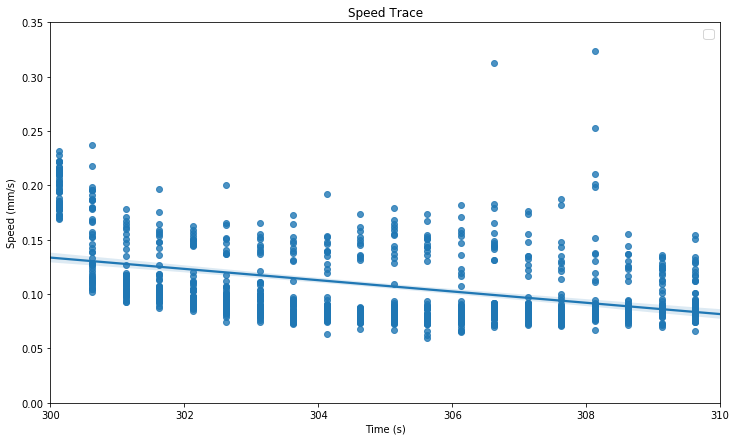

In [38]:
plt.figure(linewidth = 2.5)#<- Make your figure lines THICCCC for clean display (posters)
plt.figure(figsize=(12,7))#<- set your figure size (width, length)
plt.gca().xaxis.grid(False)#<- gets rid of x-axis markers to make data look clean 
ax = sns.regplot(x="time_bin", #<- Here we use seaborn as our graphing package. 
             y="speed", 
             data = AQ2028_Pulse1,
             #hue = 'dataset', #<- Here we use the extra column from step 6 to separate by group
             #palette = 'deep'
                )#<- Change colour palette here if you like
plt.xlabel("Time (s)")#<- X-axis title
plt.ylabel("Speed (mm/s)")#<- Y-Axis title
plt.title("Speed Trace")#<- Figure Title
plt.ylim(top = top) #<- setting the viewing range, from previous input in step 2
plt.ylim(bottom = bottom)
plt.xlim(left= 300)
plt.xlim(right = 310)
ax.legend(loc = 'upper right', fontsize = '13') #<- location of your legend
plt.savefig(f'Speed_Trace_{left}to{right}s.png', format='png', dpi=900) #<- saves the figure to a tif file
plt.show()

# 8.2 Graphing without Light Pulse (Run this if you dont use ChR2)

In [ ]:
plt.figure(linewidth = 2.5)
plt.figure(figsize=(12,7))
plt.gca().xaxis.grid(False)
ax = sns.lineplot(x="time_bin", 
             y="speed", 
             data = TotalConcatenated,
             hue = 'dataset',
             palette = 'deep')
plt.xlabel("Time (s)")
plt.ylabel("Speed (mm/s)")
plt.title("Speed Trace")
plt.ylim(top = top)
plt.ylim(bottom = bottom)
plt.xlim(left= left)
plt.xlim(right = right)
ax.legend(loc = 'upper right', fontsize = '13')
plt.savefig(f'Speed_Trace_{left}to{right}s.png', format='png', dpi=900)
plt.show()

# Done!